In [1]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWnltk_nostemming.pkl')

In [ ]:
train_s, test_s = [],[]
for n in range(1,50,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_s.append(knn.score(X_train,y_train))
    test_s.append(knn.score(X_test,y_test))
plt.plot(range(1,50,2),train_s,label='train')
plt.plot(range(1,50,2),test_s,label='test')
plt.legend()
print(f"Max test score: {np.max(test_s)}")
print(f"Best n neightbor: {np.argmax(test_s)+1}")

In [ ]:
test_s

In [ ]:
kf = KFold(n_splits=5)
i = 1
for train_index, test_index in kf.split(df):
#     print(test_index)
#     print(train_index[0],"-",train_index[len(train_index)-1])
    print(test_index[0],"+",test_index[len(test_index)-1])
    X_train = df['text'].iloc[train_index[0]:train_index[len(train_index)-1]]
    X_test = df['text'].iloc[test_index[0]:test_index[len(test_index)-1]]
    y_train = df['label'].iloc[train_index[0]:train_index[len(train_index)-1]].astype('int')
    y_test = df['label'].iloc[test_index[0]:test_index[len(test_index)-1]].astype('int')
    
#     vectorizer = TfidfVectorizer()
#     X_train = vectorizer.fit_transform(X_train)
#     X_test = vectorizer.transform(X_test)
    counter = CountVectorizer(min_df=3,
                              dtype=np.double)
    counter.fit(X_train)
    X_train = counter.transform(X_train)
    X_test = counter.transform(X_test)
    
    transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    tem1 = vectorizer.get_feature_names()
    fk = int(len(tem1))
    k = round((i/10)*fk)
    
    X_train,X_test = select_features(X_train, y_train, X_test,k)
    
    modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
    modelknn2.fit(X_train,y_train)
    y_pred = modelknn2.predict(X_test)
#     print(classification_report(y_test,y_pred))
    result = modelknn2.score(X_test, y_test)
    print("Fold ke-",i,"=",result)
    print("----------------")
    i+=1

In [20]:
def split(strt,fnsh,df):
    X_test = df['text'].iloc[strt:fnsh]
    y_test = df['label'].iloc[strt:fnsh].astype('int')
    df.drop(df.index[strt:fnsh])
    X_train = df['text']
    y_train = df['label'].astype('int')    
    return X_train, X_test, y_train, y_test

In [21]:
def select_features(train_X, train_y, test_X,k):
#     total fitur 7343
# 2004
# 1802 nltk
# 2599 sastrawi 1967
    selector = SelectKBest(chi2, k=k)
    selector.fit(train_X, train_y)
#     new = selector.fit_transform(train_X, train_y)
#     print(new.shape)
    train_X = selector.transform(train_X)
    test_X = selector.transform(test_X)
    return train_X, test_X

In [22]:
def classifier(df,distance_name,k_neighbor):
    print("Nama distance=",distance_name)
    print("Jumlah K tetangga=",k_neighbor)
#     360
#     spl = [0,36,72,108,144,180,216,252,288,324,360]
#     960
#     spl = [0,96,192,288,384,480,576,672,768,864,960]
#     1080
    spl = [0,108,216,324,432,540,648,756,864,972,1080]
    tempspl = []
    acc_score = []
    i = 0
    akurasimax=0
    while (i<len(spl)-1):
        if len(spl)-2 != len(tempspl):
            X_train, X_test, y_train, y_test = split(spl[i],spl[i+2],df)
            tempspl.append(spl[i])
    #   ketika array[i+2] == null (looping terakhir)
        elif (len(spl)-len(tempspl)) == 2:
    #       split last and first
            X_test1 = df['text'].iloc[spl[i]:spl[i+1]]
            y_test1 = df['label'].iloc[spl[i]:spl[i+1]].astype('int')
            X_test2 = df['text'].iloc[tempspl[0]:tempspl[1]]
            y_test2 = df['label'].iloc[tempspl[0]:tempspl[1]].astype('int')
    #       concat last and first
            X_test = pd.concat([X_test1, X_test2], axis=0)
            y_test = pd.concat([y_test1, y_test2], axis=0)
    #       split except last and first
            X_train = df['text'].iloc[tempspl[1]:tempspl[len(tempspl)-1]]
            y_train = df['label'].iloc[tempspl[1]:tempspl[len(tempspl)-1]].astype('int')
        
#         vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

#         counter = CountVectorizer(min_df=3,
#                               dtype=np.double)
#         counter.fit(X_train)
#         X_train = counter.transform(X_train)
#         X_test = counter.transform(X_test)

#         transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
#         X_train = transformer.fit_transform(X_train)
#         X_test = transformer.transform(X_test)
#         X_train,X_test = select_features(X_train, y_train, X_test,k)

        modelknn = KNeighborsClassifier(n_neighbors=k_neighbor, weights='distance', metric=distance_name)
        modelknn.fit(X_train,y_train)
        y_pred = modelknn.predict(X_test)
#         print(classification_report(y_test,y_pred))
        result = modelknn.score(X_test, y_test)
        acc = accuracy_score(y_pred , y_test)
        acc_score.append(acc)
        print("Fold ke-",i+1,"=",result)
        if (result >= akurasimax):
            akurasimax = result
            foldke = i+1
        i+=1
    avg_acc_score = sum(acc_score)/10
    print('Avg accuracy : {}'.format(avg_acc_score))
    print("Akurasi terbaik adalah",akurasimax,"pada fold ke-",foldke)
    print("------------------------------------")
    return akurasimax

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.625
Avg accuracy : 0.9625
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.6527777777777778
Avg accuracy : 0.9652777777777779
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 5
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.7175925925925926
Avg accuracy : 0.9717592592592592
Akurasi terbaik ada

Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.7638888888888888
Avg accuracy : 0.976388888888889
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------


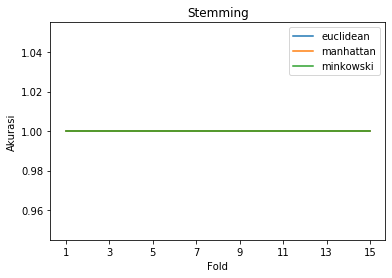

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.625
Avg accuracy : 0.9625
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.6666666666666666
Avg accuracy : 0.9666666666666666
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 5
Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.7222222222222222
Avg accuracy : 0.9722222222222221
Akurasi terbaik adalah

Fold ke- 1 = 1.0
Fold ke- 2 = 1.0
Fold ke- 3 = 1.0
Fold ke- 4 = 1.0
Fold ke- 5 = 1.0
Fold ke- 6 = 1.0
Fold ke- 7 = 1.0
Fold ke- 8 = 1.0
Fold ke- 9 = 1.0
Fold ke- 10 = 0.7777777777777778
Avg accuracy : 0.9777777777777779
Akurasi terbaik adalah 1.0 pada fold ke- 9
------------------------------------


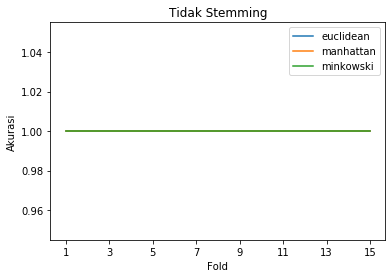

Lama Proses 747.8329679965973 seconds
Wall time: 12min 27s


In [23]:
%%time
# %%capture cap --no-stderr
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax = classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
#         tapi fold yang dipakai beda beda
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))
# with open('5000_fitur_SWnltkv2.txt', 'w') as f:
#     f.write(cap.stdout)

In [ ]:
df.text.loc[0]

# try--

In [ ]:
def asd(df):
    X_train, X_test, y_train, y_test = split(540,756,df)
    return X_train, X_test, y_train, y_test

In [ ]:
def fclas(df):
    X_train, X_test, y_train, y_test = split(540,756,df)
    vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    tem1 = vectorizer.get_feature_names()
    fk = int(len(tem1))
    i = 1
    arrplt,arri = [],[]
    while (i<=10):
        k = round((i/10)*fk)
        X_train, X_test, y_train, y_test = asd(df)
        vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train,X_test = select_features(X_train, y_train, X_test,k)
        modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
        modelknn2.fit(X_train,y_train)
        y_pred = modelknn2.predict(X_test)
        persen = i/10*100
        print("Klasifikasi dengan",k,"fitur /",persen,"%")
        print(classification_report(y_test,y_pred))
        result = modelknn2.score(X_test, y_test)
        print("Akurasi=",result)
        arri.append(persen)
        arrplt.append(result)
        print("----------------------------------------------------------------")
        i+=1
    plt.plot(arri, arrplt, label = "Seleksi Fitur")
    plt.xticks(arri)
    plt.xlabel('Banyak fitur (dalam persen)')
    plt.ylabel('Akurasi')
    plt.show()

In [ ]:
dff = [df,dfNo]
for i in range(2):
    fclas(dff[i])

In [6]:
X_train, X_test, y_train, y_test = split(540,756,df)

In [ ]:
print(len(X_train))

In [ ]:
X_train = df['text'].iloc[108:]
X_test = df['text'].iloc[:192]
y_train = df['label'].iloc[192:].astype('int')
y_test = df['label'].iloc[:192].astype('int')

In [ ]:
X = df['text']
y = df['label'].astype('int')
# X = dfNo['text']
# y = dfNo['label'].astype('int')

In [8]:
# Pembentukan tf-idf untuk pembobotan
# X_train, X_test, y_train, y_test = split(540,756,df)
vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X)
# print(X)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# X_train,X_test = select_features(X_train, y_train, X_test)

In [ ]:
X.todense()
# X1.todense()
print(vectorizer.get_feature_names())
tem1 = vectorizer.get_feature_names()
print(tem1)

In [ ]:
print(len(tem1))

In [ ]:
corpus = df['text']

In [ ]:
# print(vectorizer.vocabulary_)
# print(len(vectorizer.get_feature_names()))
df_coba = pd.DataFrame(X.todense().T,
                      index=vectorizer.get_feature_names())
#                       column=[f'D{i+1}' for i in range(len(corpus))])
df_coba

In [ ]:
mod = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='euclidean')
cross_val_score(mod,X,y,cv=5)

In [ ]:
cross_val_score(mod,X,y,cv=10).mean()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# X_train
X_test

In [14]:
%%time
modelknn2 = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean')
modelknn2.fit(X_train,y_train)

Wall time: 2.01 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [15]:
y_pred = modelknn2.predict(X_test)
y_pred

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
modelknn2.predict_proba(X_test)

array([[9.99999907e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.78775113e-08, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.99999914e-01, 0.00000000e+00, ...,
        2.10734193e-08, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.05367109e-08, 9.99999982e-01, 0.00000000e+00],
       [1.58581234e-08, 4.85691972e-08, 3.16121483e-08, ...,
        2.10734194e-08, 1.61129322e-08, 9.99999835e-01]])

In [17]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        18

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [ ]:
result = modelknn2.score(X_test, y_test)
print(result)

In [ ]:
from sklearn.metrics import precision_score
haha = precision_score(y_test,y_pred,average='weighted')
print(haha)

In [ ]:
from sklearn.metrics import recall_score
hehe = recall_score(y_test, y_pred, average='weighted')
print(hehe)

In [ ]:
from sklearn.metrics import f1_score
hoho = f1_score(y_test, y_pred, average='weighted')
print(hoho)

In [ ]:
result_class = pd.DataFrame({'Actual Result':y_test, 'Predicted Result':y_pred})
result_class

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(result_class)